<a href="https://colab.research.google.com/github/Hamilton-at-CapU/comp215/blob/main/labs/lab04-more_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 4
----------------
#### Name(s):
#### Date:

By the end of this lab you should be able to:
  * use composition and inheritance in a `class` to categorize related information


During this lab, you will be introduced to the following:
  * something, something



## Near Earth Objects (with more classes)

We'll continue working with Near Earth Object data using NASA's API: https://api.nasa.gov/.  In Lab 3 we defined an Asteroid class that contained a simple data structure.  In this lab, we will be Here's a brief review from Lab 2 on how to use the API.  

In [1]:
# import necessary modules
import datetime, json, requests
from pprint import pprint

### Review: make an API query

Here's a query that gets the record for a single NEO that recently passed by.

In [2]:
#API_KEY = 'DEMO_KEY'  # substitute your API key here
API_KEY = 'y3cZQ4qNhbXhnjXIc3y14IobggLUDyZ36h41zeTT'

def get_neos(start_date):
    """ Return a list of NEO for the week starting at start_date """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&api_key={API_KEY}'
    # Fetch last week's NEO feed
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    #pprint(data)
    print(f'{data["element_count"]} Near Earth Objects found for week of {start_date}')
    return [neo for dated_records in data['near_earth_objects'].values() for neo in dated_records ]

def get_neo(id):
    """ Return a NEO record for the given id """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    return json.loads(response.text)

week_start = '2023-01-15'
neos = get_neos(week_start)
assert len(neos) > 0, f'Oh oh!  No NEOs found for {week_start}'
neo = get_neo(neos[-1]['id'])  # get the very latest NEO
print(f"Record for NEO ID {neos[-1]['id']} is:")
pprint(neo)

117 Near Earth Objects found for week of 2023-01-15
Record for NEO ID 54339874 is:
{'absolute_magnitude_h': 24.86,
 'close_approach_data': [{'close_approach_date': '1949-07-04',
                          'close_approach_date_full': '1949-Jul-04 22:19',
                          'epoch_date_close_approach': -646710060000,
                          'miss_distance': {'astronomical': '0.419726307',
                                            'kilometers': '62790161.51016609',
                                            'lunar': '163.273533423',
                                            'miles': '39015997.166588442'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '73509.6739172087',
                                                'kilometers_per_second': '20.4193538659',
                                                'miles_per_hour': '45676.0526626122'}},
                         {'close_approach_date': '1950-0

## Exercise 1: Define a CloseApproach class

Each NEO record comes with a list of `close_approach_data`, where each record in this list represents a single “close approach” to another orbiting body.
1. Develop a class named `CloseApproach` to represent a single close approach record.  State variables are

        neo (refrence to related NEO object)
        orbiting body (str)
        approach date (datetime object!)
        miss distance (float - choose units, document it, and be consistent!)
        relative velocity (ditto)
  
2. Define a "Factory" class method to construct a `CloseApproach` object from one close approach data record (a dictionary object). This method takes a `neo` object as input for the NEO to which the close approach data belongs. Remember to parse the date/time string into a datetime object.

In [3]:
# Ex. 1 your code here
from datetime import datetime

class CloseApproach:
        
    def __init__(self, neo, orbiting_body, approach_date, miss_distance_km, relative_velocity_kmh):
        self.neo = neo
        self.orbiting_body = orbiting_body
        self.approach_date = approach_date
        self.miss_distance_km = float(miss_distance_km)
        self.relative_velocity_kmh = float(relative_velocity_kmh)
    
    @classmethod
    def from_dict(cls, neo, data):
        
        approach_date = datetime.strptime(data['close_approach_date_full'], "%Y-%b-%d %H:%M")
        miss_distance_km = data['miss_distance']['kilometers']
        relative_velocity_kmh = data['relative_velocity']['kilometers_per_hour']
        
        return cls(neo, data['orbiting_body'], approach_date, miss_distance_km, relative_velocity_kmh)
    
    def __repr__(self):
        return (f"CloseApproach(neo={self.neo.name}, orbiting_body={self.orbiting_body}, "
                f"approach_date={self.approach_date}, miss_distance_km={self.miss_distance_km}, "
                f"relative_velocity_kmh={self.relative_velocity_kmh})")


## Exercise 2: Add list of CloseApproach objects to the Asteroid

Define an `Asteroid` class, like you did in Lab 3, but give the `Asteroid` list of “close approaches”.  This is called *composition* because each Asteroid object will be *composed* of CloseApproach objects (plus some other things).  There is bit of a catch-22 here because we need the `Asteroid` to construct the `CloseApproach` objects. The first two steps deal with that:

1. Add an instance variable to your Asteroid class with a default value of an empty list:

    ```
    close_approaches:list = []
    ```
      
2. In the Asteroid `from_NEO` factory, use a list comprehension to build the list of `CloseApproach` objects for the Asteroid instance, and then set the instance's `close_approaches` variable before returning it. Setting the value of an object's instance variables from outside the class is generally frowned upon - this is why we make the factory a method of the class itself.

3. Add a method to `Asteroid` to return the `CloseApproach` object for the nearest miss (ie. smallest `missed_distance`):
    ```
    def nearest_miss(self):
        ...
    ```

4. Add a method to the Asteroid class, `closest_earth_approach`, that returns the CloseApproach object that represents the closest approach the Asteroid makes to Earth.
    ```
    def closest_earth_approach(self):
        ...
    ```

Write some test code to demonstrate these new features.

In [4]:
# Ex. 2 your code here
import datetime, json, requests
from pprint import pprint

API_KEY = 'y3cZQ4qNhbXhnjXIc3y14IobggLUDyZ36h41zeTT'

class CloseApproach:
    def __init__(self, data):
        self.date = data['close_approach_date']
        self.missed_distance = data['miss_distance']['kilometers']
        self.distance_from_earth = data['miss_distance']['kilometers']
    
    def __repr__(self):
        return f"CloseApproach(date={self.date}, missed_distance={self.missed_distance}, distance_from_earth={self.distance_from_earth})"

class Asteroid:
    def __init__(self, name, size, close_approaches=None):
        self.name = name
        self.size = size
        self.close_approaches = close_approaches if close_approaches else []

    @classmethod
    def from_NEO(cls, data):
        close_approaches = [CloseApproach(item) for item in data['close_approach_data']]
        return cls(data['name'], data['size'], close_approaches)

    def nearest_miss(self):
        return min(self.close_approaches, key=lambda ca: ca.missed_distance)

    def closest_earth_approach(self):
        return min(self.close_approaches, key=lambda ca: ca.distance_from_earth)


def get_neos(start_date):
    """ Return a list of NEO for the week starting at start_date """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    print(f'{data["element_count"]} Near Earth Objects found for week of {start_date}')
    return [neo for dated_records in data['near_earth_objects'].values() for neo in dated_records]

def get_neo(id):
    """ Return a NEO record for the given id """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    return json.loads(response.text)

# Test example
week_start = '2023-01-15'
neos = get_neos(week_start)
assert len(neos) > 0, f'Oh oh!  No NEOs found for {week_start}'
neo = get_neo(neos[-1]['id'])  # get the very latest NEO
print(f"Record for NEO ID {neos[-1]['id']} is:")
pprint(neo)

# Extracting data for Asteroid class
asteroid_data = {
    'name': neo['name'],
    'size': neo['estimated_diameter']['kilometers']['estimated_diameter_max'],
    'close_approach_data': neo['close_approach_data']  # Extract close approach data
}

# Create the Asteroid object using the from_NEO factory method
asteroid = Asteroid.from_NEO(asteroid_data)

# Print the nearest miss and closest Earth approach
print(f"Nearest miss: {asteroid.nearest_miss()}")
print(f"Closest Earth approach: {asteroid.closest_earth_approach()}")


117 Near Earth Objects found for week of 2023-01-15
Record for NEO ID 54339874 is:
{'absolute_magnitude_h': 24.86,
 'close_approach_data': [{'close_approach_date': '1949-07-04',
                          'close_approach_date_full': '1949-Jul-04 22:19',
                          'epoch_date_close_approach': -646710060000,
                          'miss_distance': {'astronomical': '0.419726307',
                                            'kilometers': '62790161.51016609',
                                            'lunar': '163.273533423',
                                            'miles': '39015997.166588442'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '73509.6739172087',
                                                'kilometers_per_second': '20.4193538659',
                                                'miles_per_hour': '45676.0526626122'}},
                         {'close_approach_date': '1950-0

## Exercise 3: Plot the Closest Approaches

Write a function that takes an Asteroid object as a parameter and makes a timeline plot of close approaches.  You may wish to use the `matplotlib.pyplot` `plot` object.  Here is an example of a timeline plot for the asteroid with neo id '54339874'

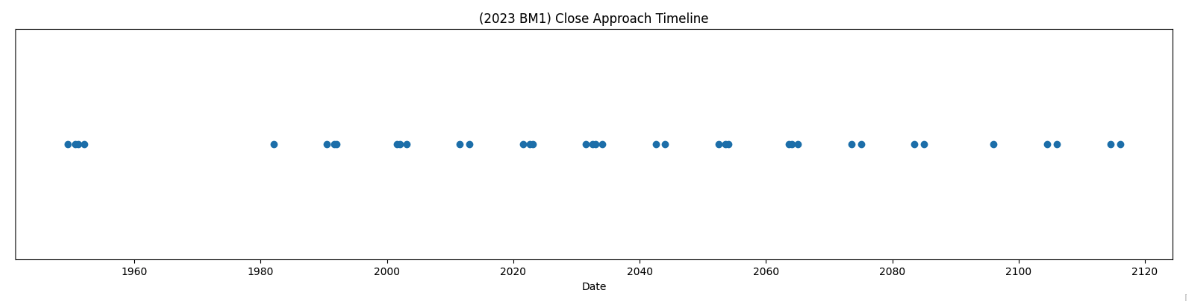

117 Near Earth Objects found for week of 2023-01-15


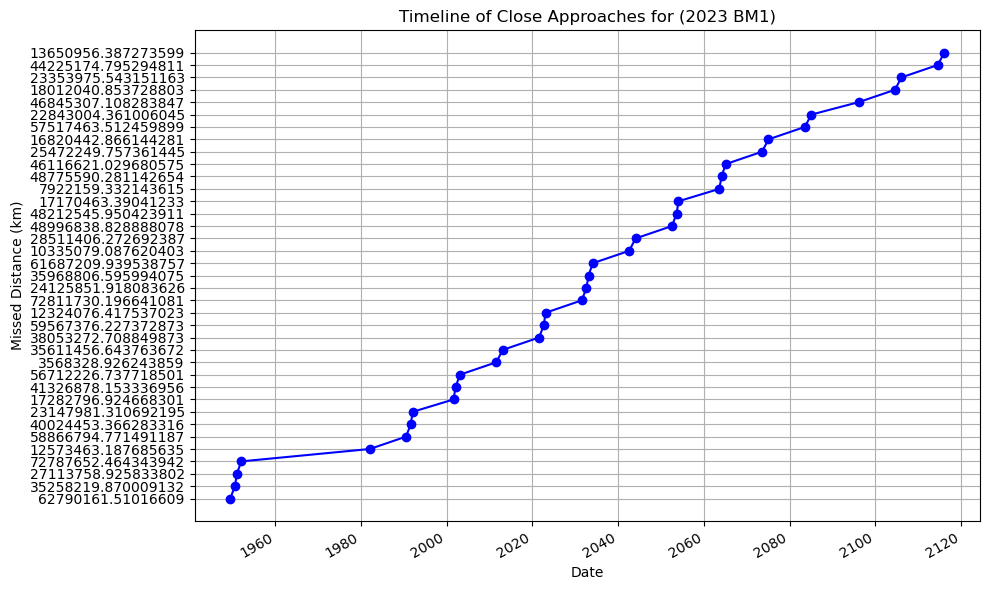

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def plot_close_approaches(asteroid):
     # Create a timeline plot of the asteroid's close approaches.
    dates = [datetime.strptime(ca.date, '%Y-%m-%d') for ca in asteroid.close_approaches]
    missed_distances = [ca.missed_distance for ca in asteroid.close_approaches]
    
    plt.figure(figsize=(10, 6))
    plt.plot(dates, missed_distances, marker='o', linestyle='-', color='b')

    plt.title(f"Timeline of Close Approaches for {asteroid.name}")
    plt.xlabel("Date")
    plt.ylabel("Missed Distance (km)")

    # Major ticks at every 20 years
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(20))  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()  

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example 
week_start = '2023-01-15'
neos = get_neos(week_start)
neo = get_neo(neos[-1]['id'])  # latest NEO data

# Extracting data for Asteroid class
asteroid_data = {
    'name': neo['name'],
    'size': neo['estimated_diameter']['kilometers']['estimated_diameter_max'],
    'close_approach_data': neo['close_approach_data']
}


asteroid = Asteroid.from_NEO(asteroid_data)
plot_close_approaches(asteroid)


## Challenge - Take your skills to the next level...

 With these data structures in place, we can now start answering all kinds of interesting questions about a single Asteroid or a set of Asteroids.  
Here’s a couple ideas to try:



* write a **function** named `most_dangerous_approach`, that takes a date range and returns a single “potentially hazardous” Asteroid object that makes the closest approach to Earth in within that range.  Your algorithm will ultimately need to:
    * grab the list of NEO’s for the given date range;
    * use a list comprehension to build the list of Asteroid objects for the NEO’s returned
    * use a list comprehension to filter  potentially hazardous Asteroids only;
    * use a list comprehension to map each Asteroid to its  closest_earth_approach
    * apply Python’s min function to identify the Asteroid with the closest_earth_approach

You may want to decompose some of these steps into smaller functions.
* add a method to the Asteroid class, estimated_mass, that computes an estimate of the Asteroid’s mass based on its diameter.  This is a model – state your assumptions.
* add a method to the CloseApproach class, impact_force,  that estimates the force of impact if the Asteroid hit the orbiting object.  Again, this is a model, state your assumptions.

In [11]:
# Ex. 5 (challenge) your code here
import math
from datetime import datetime
import matplotlib.pyplot as plt

'''
things to consider for identifying a potential hazardous asteroid its mass , 
lets assume that the asteroid is speherical which is not nearly true but lets assume, for simplicity
so M mass, r is the radius , rho is the density of rock 2.7 g/cm³.
M = 4/3 * (pi * r^3 * rho)
if we can get the masss we can get the impact that it will have from 
F is force and v is its velocity 
 so F = 1/2 * (m * v* v)
'''


# Assuming this is already present
class CloseApproach:
    def __init__(self, data):
        self.date = data['close_approach_date']
        self.missed_distance = float(data['miss_distance']['kilometers'])
        self.distance_from_earth = float(data['miss_distance']['kilometers'])
        self.relative_velocity = float(data['relative_velocity']['kilometers_per_hour'])
    
    def impact_force(self, asteroid):
        """Estimate the impact force (in joules) if the asteroid hit the Earth."""
        # Calculate the mass of the asteroid
        mass = asteroid.estimated_mass()
        velocity = self.relative_velocity * 1000 / 3600  # Convert km/h to m/s
        return 0.5 * mass * velocity**2  # Force = 1/2 * m * v^2

class Asteroid:
    def __init__(self, name, size, close_approaches=None):
        self.name = name
        self.size = size
        self.close_approaches = close_approaches if close_approaches else []
    
    @classmethod
    def from_NEO(cls, data):
        close_approaches = [CloseApproach(item) for item in data['close_approach_data']]
        return cls(data['name'], data['size'], close_approaches)

    def nearest_miss(self):
        return min(self.close_approaches, key=lambda ca: ca.missed_distance)

    def closest_earth_approach(self):
        return min(self.close_approaches, key=lambda ca: ca.distance_from_earth)

    def estimated_mass(self):
        """Estimate the mass of the asteroid using its diameter."""
        radius = self.size / 2  # radius = diameter / 2
        density = 2.7  # average density of rock in g/cm^3
        volume = (4/3) * math.pi * radius**3  # volume of a sphere
        mass = volume * density  # mass in g
        mass_kg = mass / 1000  # convert to kg
        return mass_kg

def get_neos(start_date, end_date):
    """Return a list of NEOs for the given date range."""
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&end_date={end_date}&api_key={API_KEY}'
    response = requests.request("GET", url)
    data = json.loads(response.text)
    print(f'{data["element_count"]} Near Earth Objects found for the week of {start_date} to {end_date}')
    return [neo for dated_records in data['near_earth_objects'].values() for neo in dated_records]

def most_dangerous_approach(start_date, end_date):
    """Find the most dangerous asteroid (closest approach) within a given date range."""
    neos = get_neos(start_date, end_date)
    
    # List of potentially hazardous asteroids
    hazardous_asteroids = [
        Asteroid.from_NEO(neo) for neo in neos if neo['estimated_diameter']['kilometers']['estimated_diameter_max'] >= 140
        and any(ca['miss_distance']['astronomical'] < 0.05 for ca in neo['close_approach_data'])
    ]
    
    if not hazardous_asteroids:
        print("No potentially hazardous asteroids found for the given date range and criteria.")
        return None
    
    # Find the asteroid with the closest earth approach
    closest_asteroid = min(
        hazardous_asteroids, key=lambda asteroid: asteroid.closest_earth_approach().distance_from_earth
    )
    
    return closest_asteroid

# Example Usage
week_start = '2023-02-15'
week_end = '2023-02-22'

dangerous_asteroid = most_dangerous_approach(week_start, week_end)
if dangerous_asteroid:
    print(f"The most dangerous asteroid is: {dangerous_asteroid.name}")
    print(f"Closest Earth approach: {dangerous_asteroid.closest_earth_approach()}")
    print(f"Estimated mass: {dangerous_asteroid.estimated_mass()} kg")
else:
    print("No dangerous asteroid found for the given date range.")



142 Near Earth Objects found for the week of 2023-02-15 to 2023-02-22
No potentially hazardous asteroids found for the given date range and criteria.
No dangerous asteroid found for the given date range.
